#### DADOS

In [1]:
from igraph import *

V = {
    0: '0',
    1: '1',
    2: '2',
    3: '3',
    4: '4',
    5: '5'}

E = [[ 0, 18, 17, 23, 12, 19],
     [18,  0, 26, 31, 20, 30],
     [17, 26,  0, 16, 11,  9],
     [23, 31, 16,  0, 17, 19],
     [12, 20, 11, 17,  0, 14],
     [19, 30,  9, 19, 14,  0]]


#random.shuffle(V)

g = Graph()

#### TRATAMENTO DOS VÉRTICES

In [2]:
tags_dos_verteces=[]

for x in V:
    tags_dos_verteces.append(V[x])

g.add_vertices(len(V))      #numeros de Verteces

#### TRATAMENTO DAS ARESTAS

In [3]:
arestas=[]

for x in range(len(E)):
    for y in range(len(E[x])):
        if not(E[x][y] == -1 or E[x][y] == 0) and not((y,x) in arestas):
            arestas.append((x,y))

g.add_edges(arestas)   #arestas

#### TRATAMENTO DAS CORES

In [4]:
def peso(C):
    w = 0
    for i in range(0, len(C) - 1):
        j = i + 1
        w += E[i][j]
    w += E[C[0]][C[-1]]
    return w

def change(C, i, j):
    List = C.copy()
    a = List[j]
    b = List[i+1]
    List[i+1] = a
    List[j] = b
    return List

In [5]:
import itertools
import sys

C = [0, 1, 2, 3, 4, 5]
P = peso(C)

repeat = True

while repeat:
    pesoAtual = P
    for i in range(0, len(E)):
        
        Break2 = False
        for j in range(i + 2, len(E[i])):
            List = change(C, i, j) #gerando o novo caminho
            w = peso(List) #pesando o novo caminho   
            if w < P: #se o peso do novo caminho gerado for menor que o atual
                C = List.copy()
                P = w
                Break2 = True
                break
        if Break2: 
            break
            
    if pesoAtual == P:
        repeat = False

In [6]:
arre = []
arre_certas = []

for i in range(0, len(C) - 1):
    j = i + 1
    arre.append([C[i], C[j]])
arre.append([C[-1], C[0]])

arre_certas = []
for v in arre:
    if v[0] > v[1]:
        arre_certas.append((v[1], v[0]))
    else:
        arre_certas.append((v[0], v[1]))

#usar arestas na ordem
cores_nas_arestas = []
cores=['black', 'gray']

for a in arestas:
    if a in arre_certas:
        cores_nas_arestas.append(cores[0])
    else:
        cores_nas_arestas.append(cores[1])

#### PLOTANDO O GRAFO

caminho: [0, 5, 1, 3, 2, 4]
peso: 103


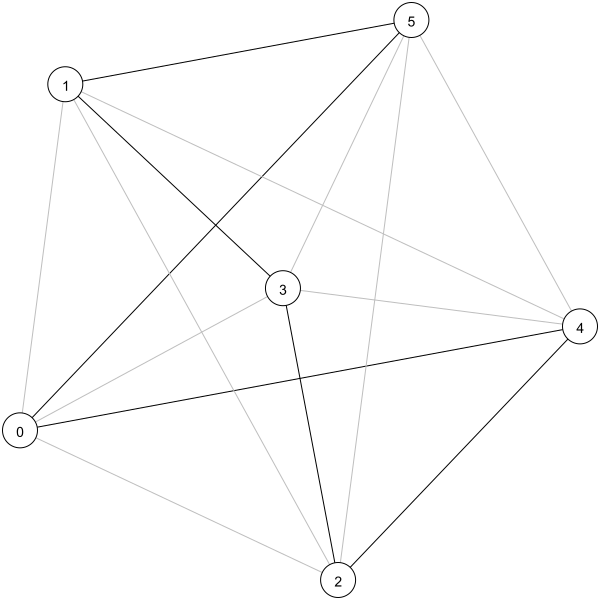

In [7]:
print("caminho: " + str(C))
print("peso: " + str(P))
plot(g,
        vertex_size=35,
        vertex_color=['white'],
        vertex_label=tags_dos_verteces,
        edge_width=[1],
        edge_color=cores_nas_arestas,
        )